KMeans Clustering

In [1]:
#Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 250
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load data
df= pd.read_csv('Mall_Data.csv', index_col=0)
df

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [3]:
df.describe()

,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000
mean,60.560000,50.200000
std,26.264721,25.823522
min,15.000000,1.000000
25%,41.500000,34.750000
50%,61.500000,50.000000
75%,78.000000,73.000000
max,137.000000,99.000000


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

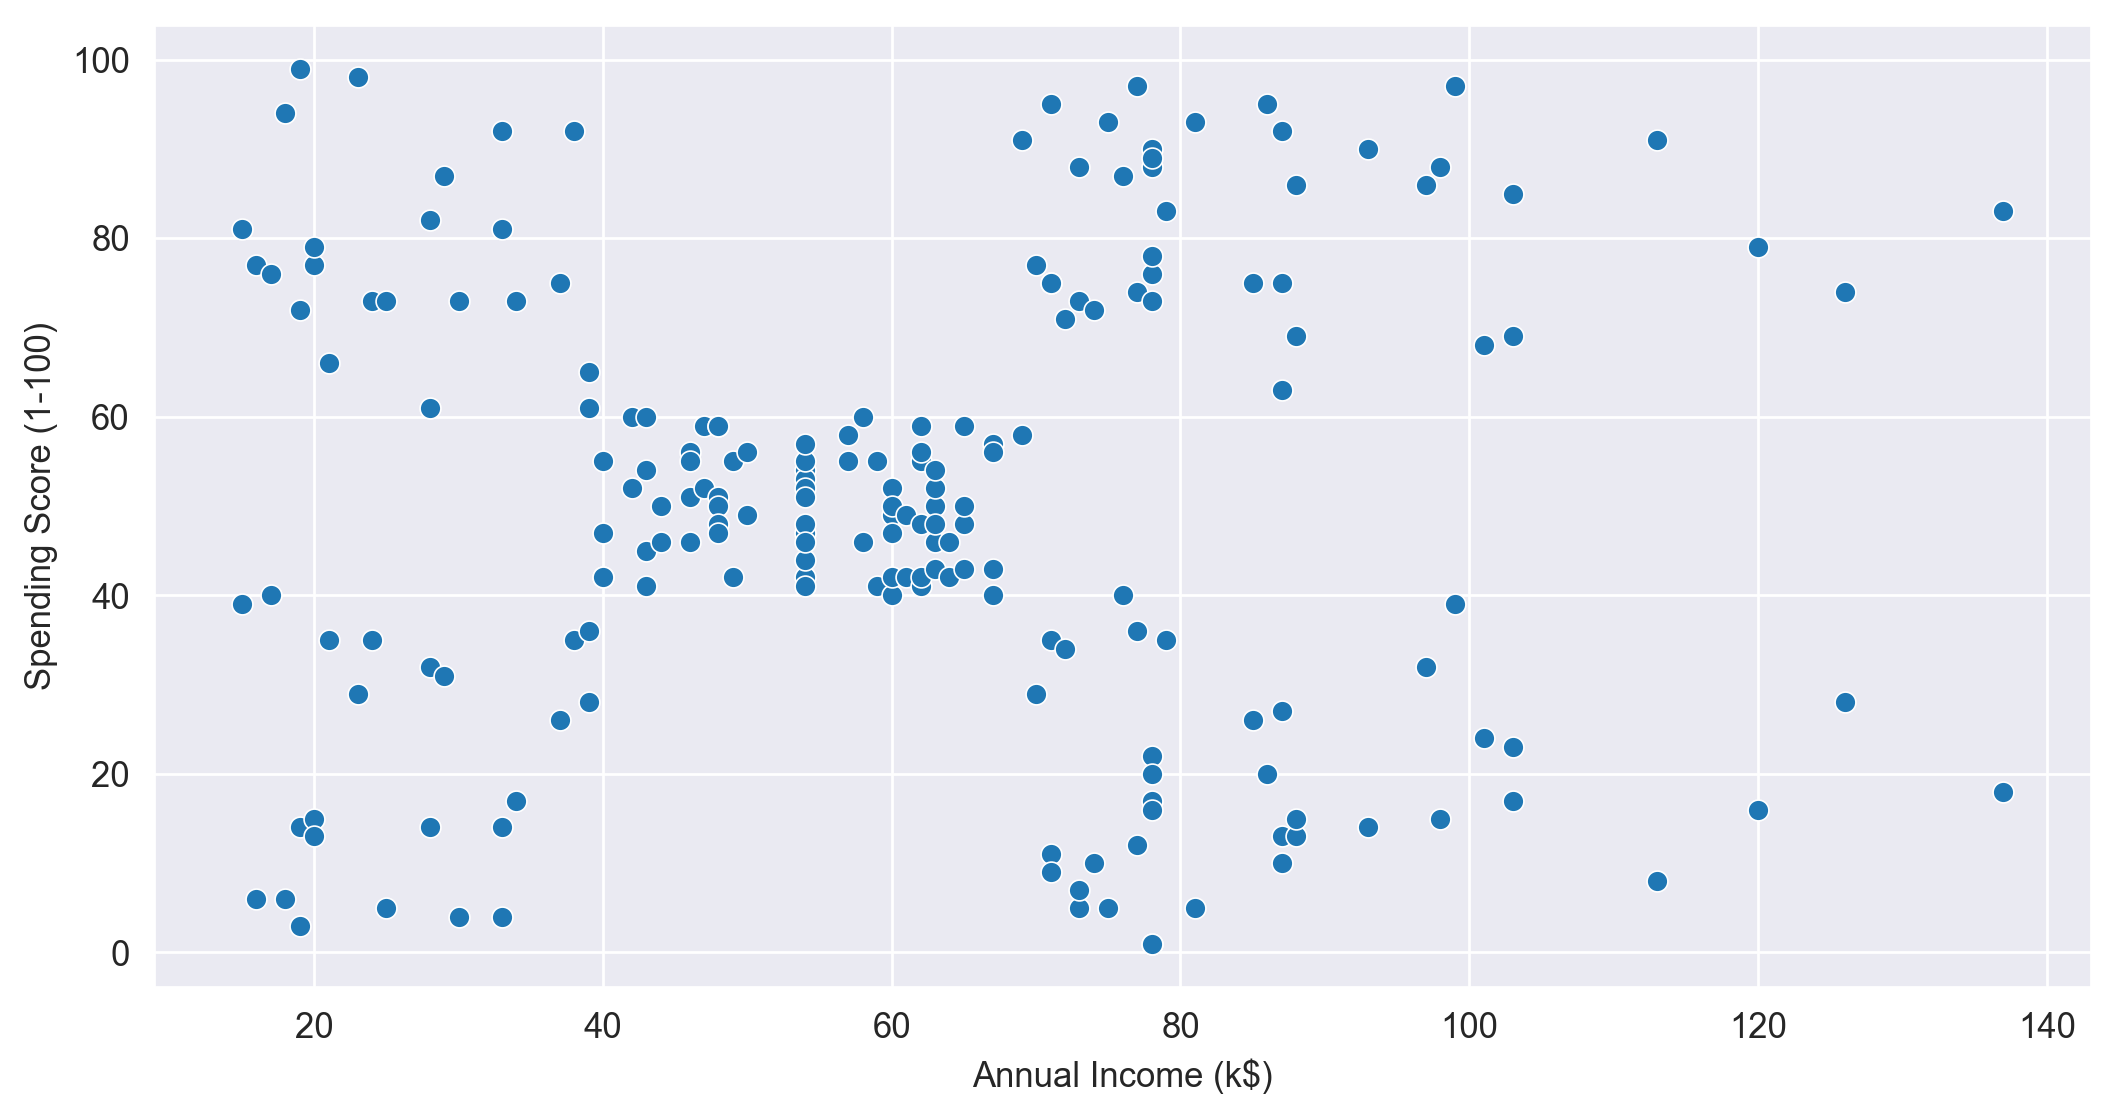

In [4]:
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'])

<Axes: xlabel='CustomerID', ylabel='Annual Income (k$)'>

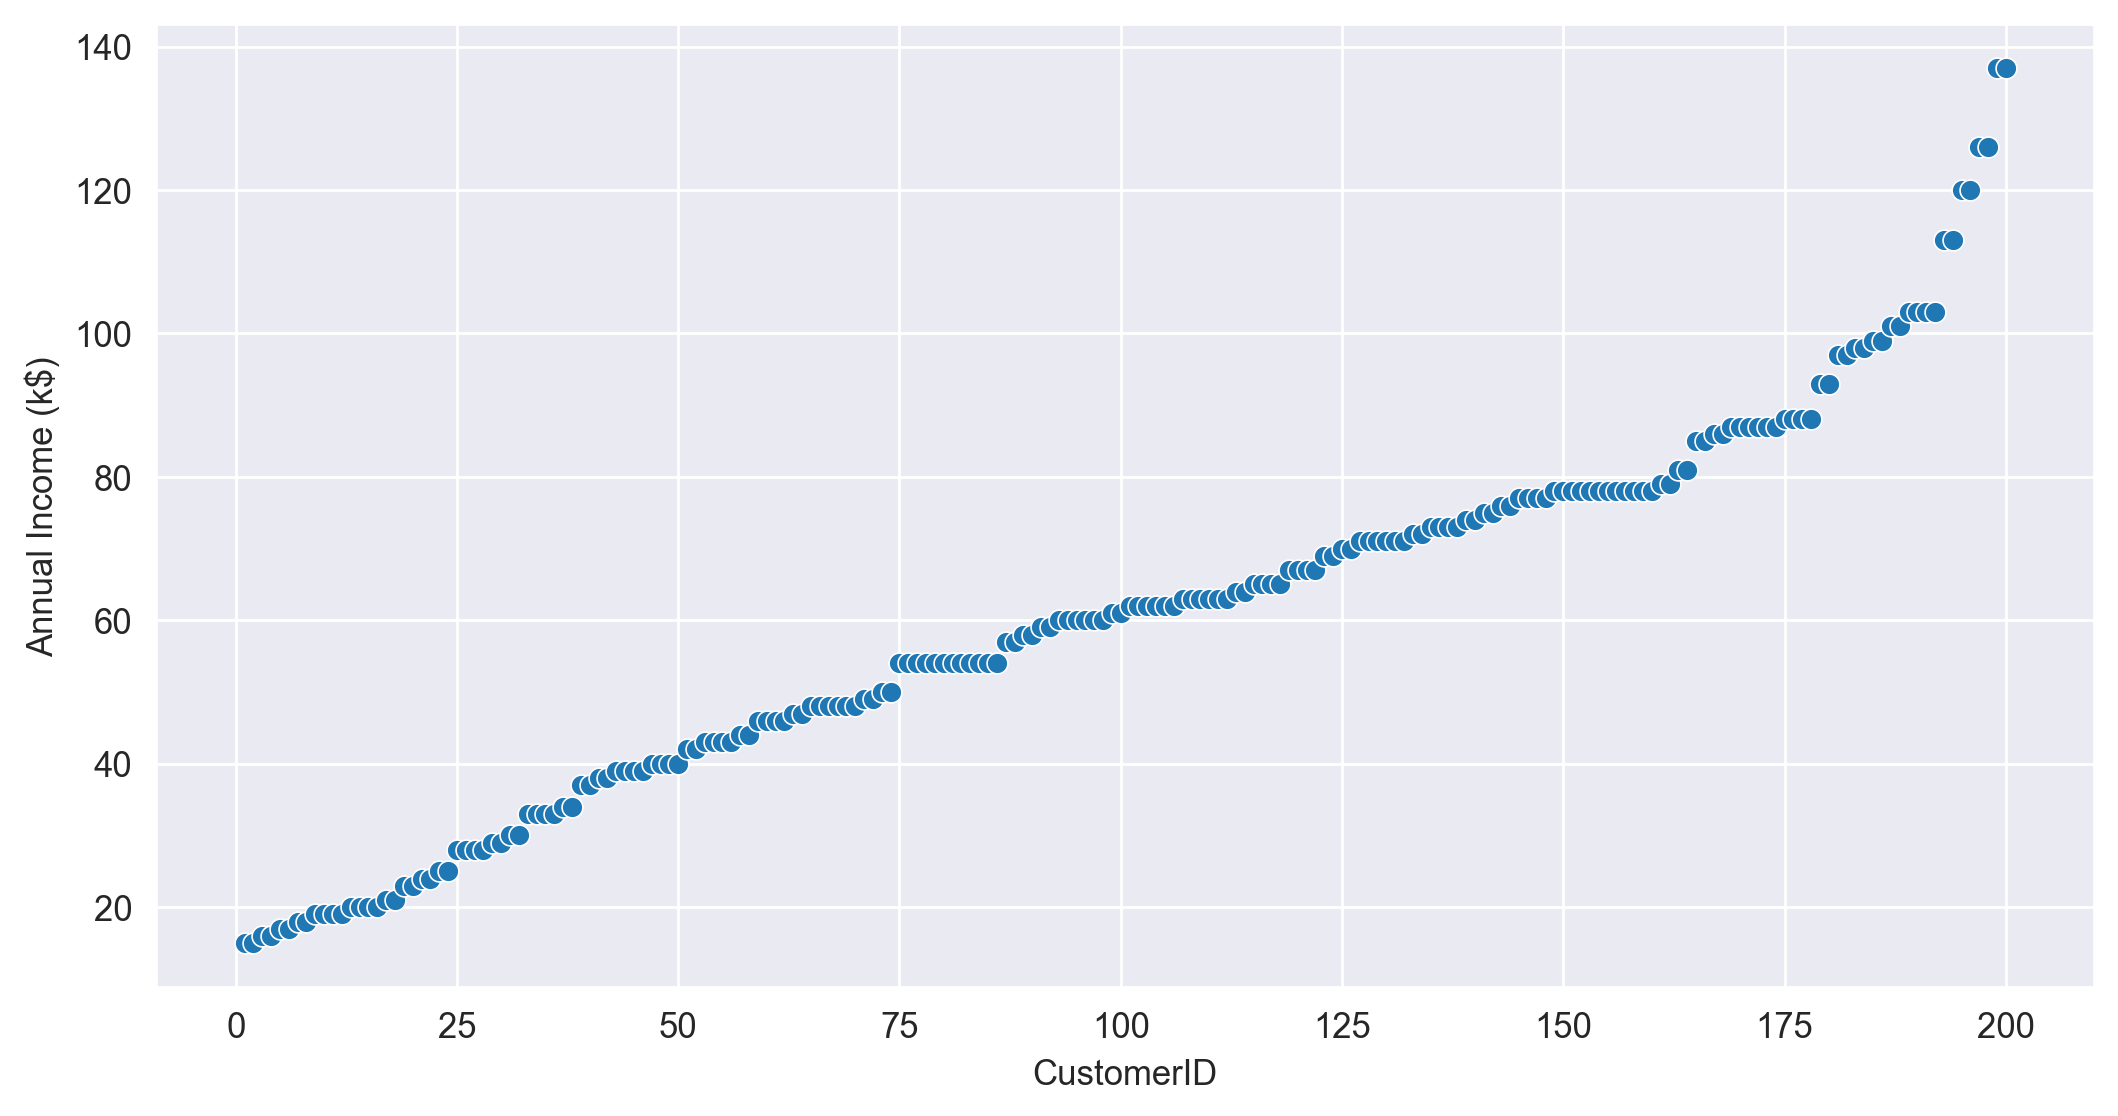

In [5]:
sns.scatterplot(df['Annual Income (k$)'])

<Axes: xlabel='CustomerID', ylabel='Spending Score (1-100)'>

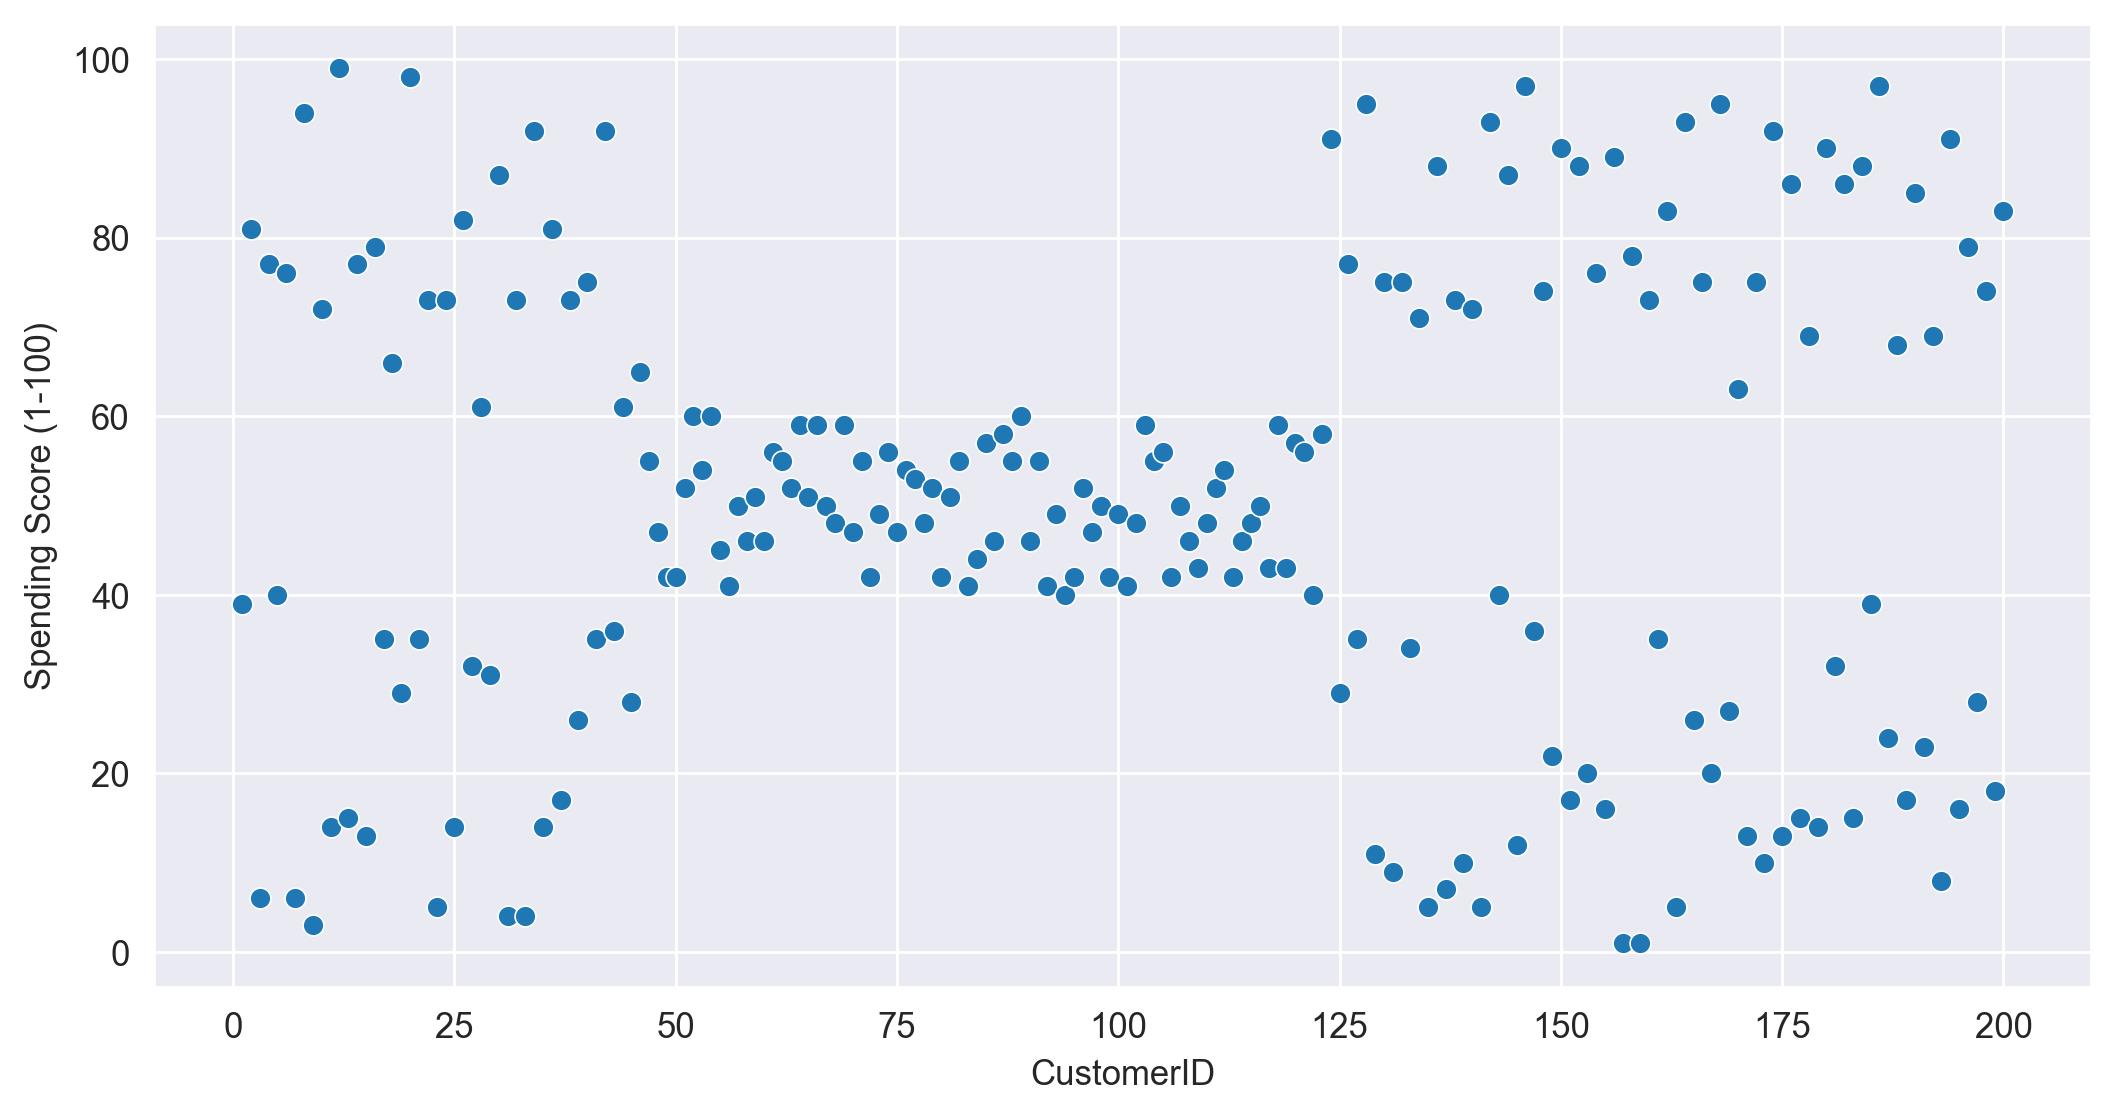

In [6]:
sns.scatterplot(df['Spending Score (1-100)'])

In [7]:
#Standardization
sc= StandardScaler()
x= sc.fit_transform(df)
x

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

In [8]:
#Model Building
km= KMeans()
y= km.fit_predict(x)

In [9]:
#Cluster Centre
km.cluster_centers_

array([[-1.35366972,  1.15873115],
       [ 0.1206509 , -0.15673077],
       [ 1.81769762,  1.26275949],
       [ 0.7489536 , -1.45651437],
       [-1.32954532, -1.16358805],
       [ 1.87564575, -1.09476801],
       [ 0.66703804,  1.23036618],
       [-0.49804891,  0.06175337]])

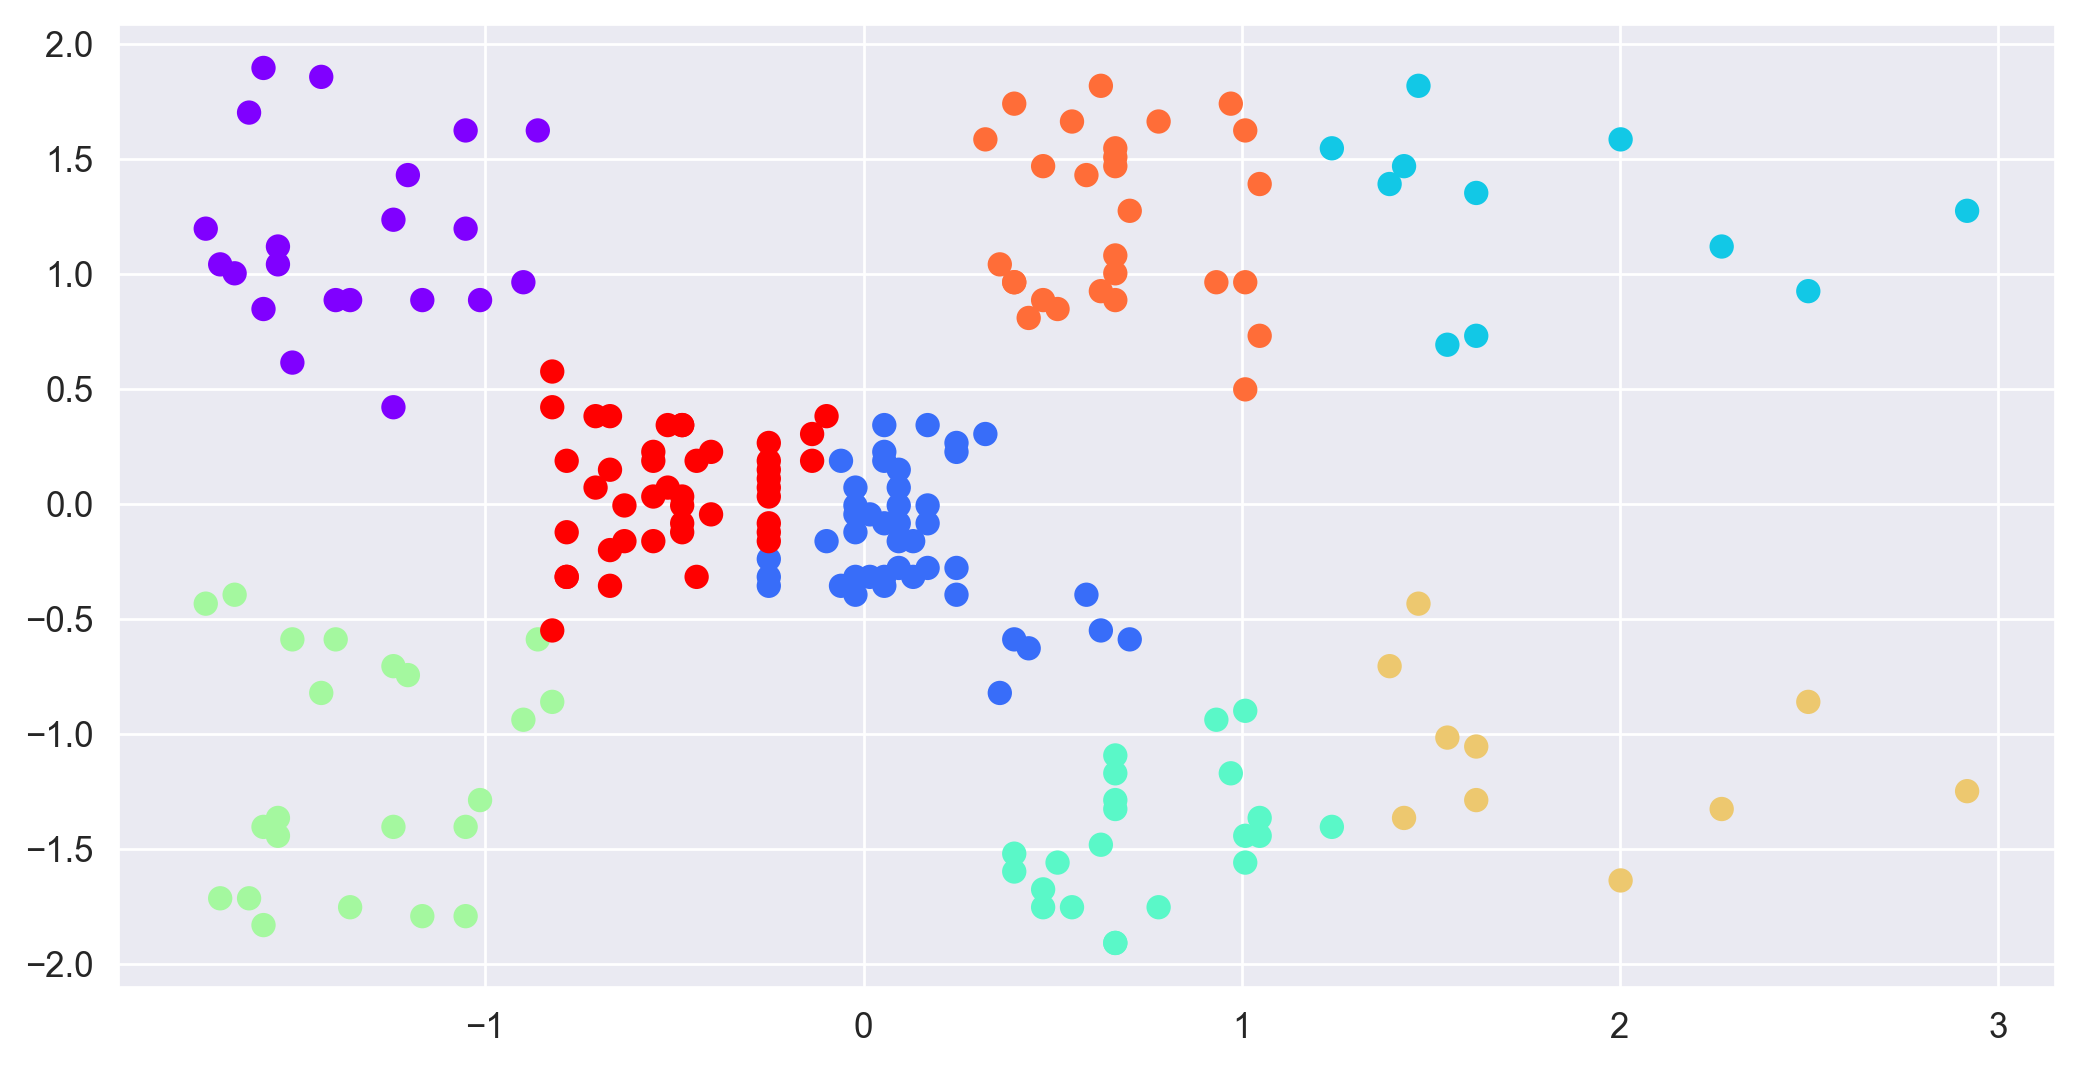

In [10]:
#Visualise the clusters
plt.scatter(x[:,0], x[:,1], c=y, cmap='rainbow')

In [11]:
from sklearn.metrics import silhouette_score

In [12]:
silhouette_score(x,y)

0.4552147906587443

Elbow Graph

In [13]:
wcss = []

for i in range (1,20):
    km= KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [14]:
wcss

[399.99999999999994,
 269.0167937490666,
 157.70400815035947,
 108.92131661364357,
 65.56840815571681,
 55.057348270386,
 44.86475569922557,
 37.18175782682131,
 32.360229825692045,
 29.07617685124427,
 26.51807429999607,
 23.425475764407672,
 21.299412162280777,
 18.86710432536354,
 17.853046158200247,
 16.377522332652937,
 15.08841205171057,
 14.329271593525203,
 13.361055543302893]

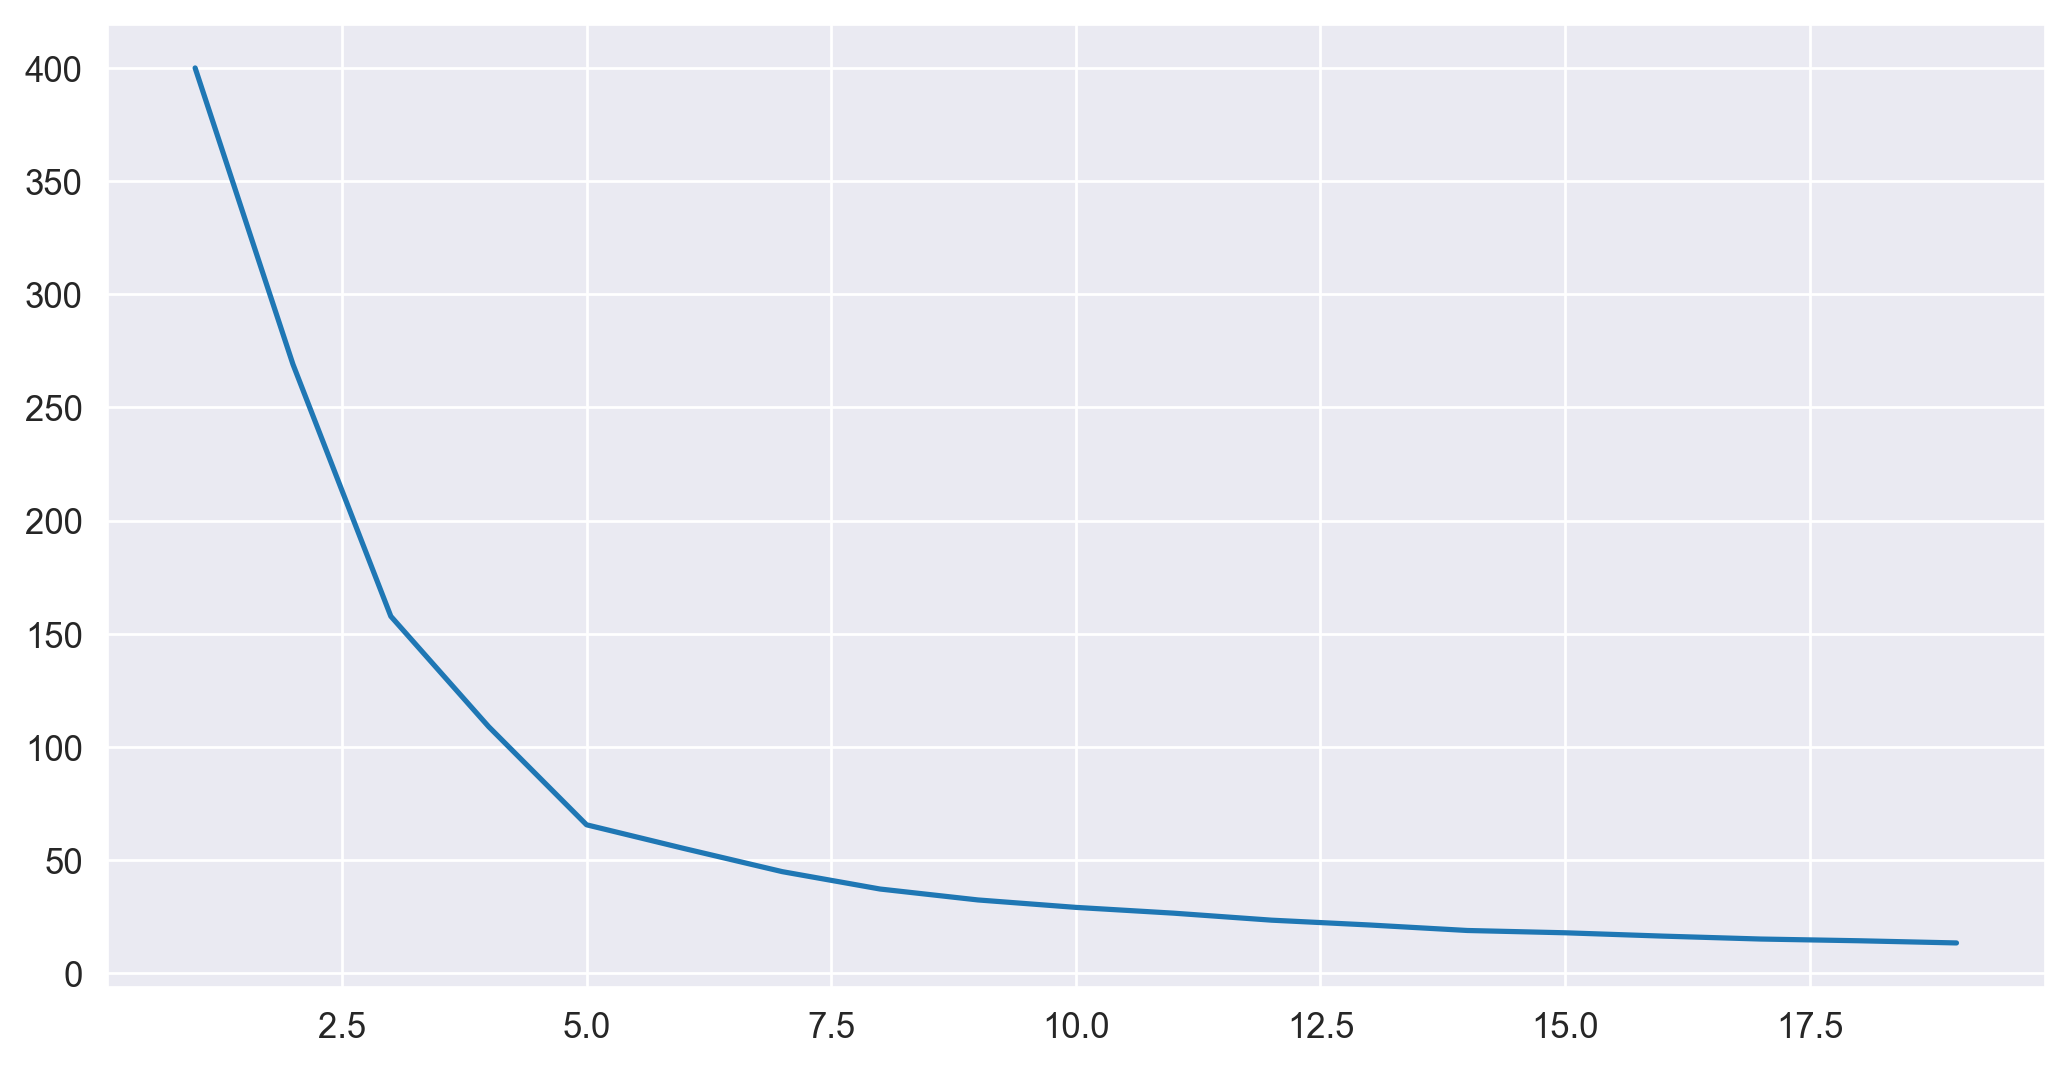

In [15]:
plt.plot(range(1,20), wcss)

Final Model

In [16]:
km= KMeans(n_clusters=5)
ypred= km.fit_predict(x)
ypred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1,
       0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

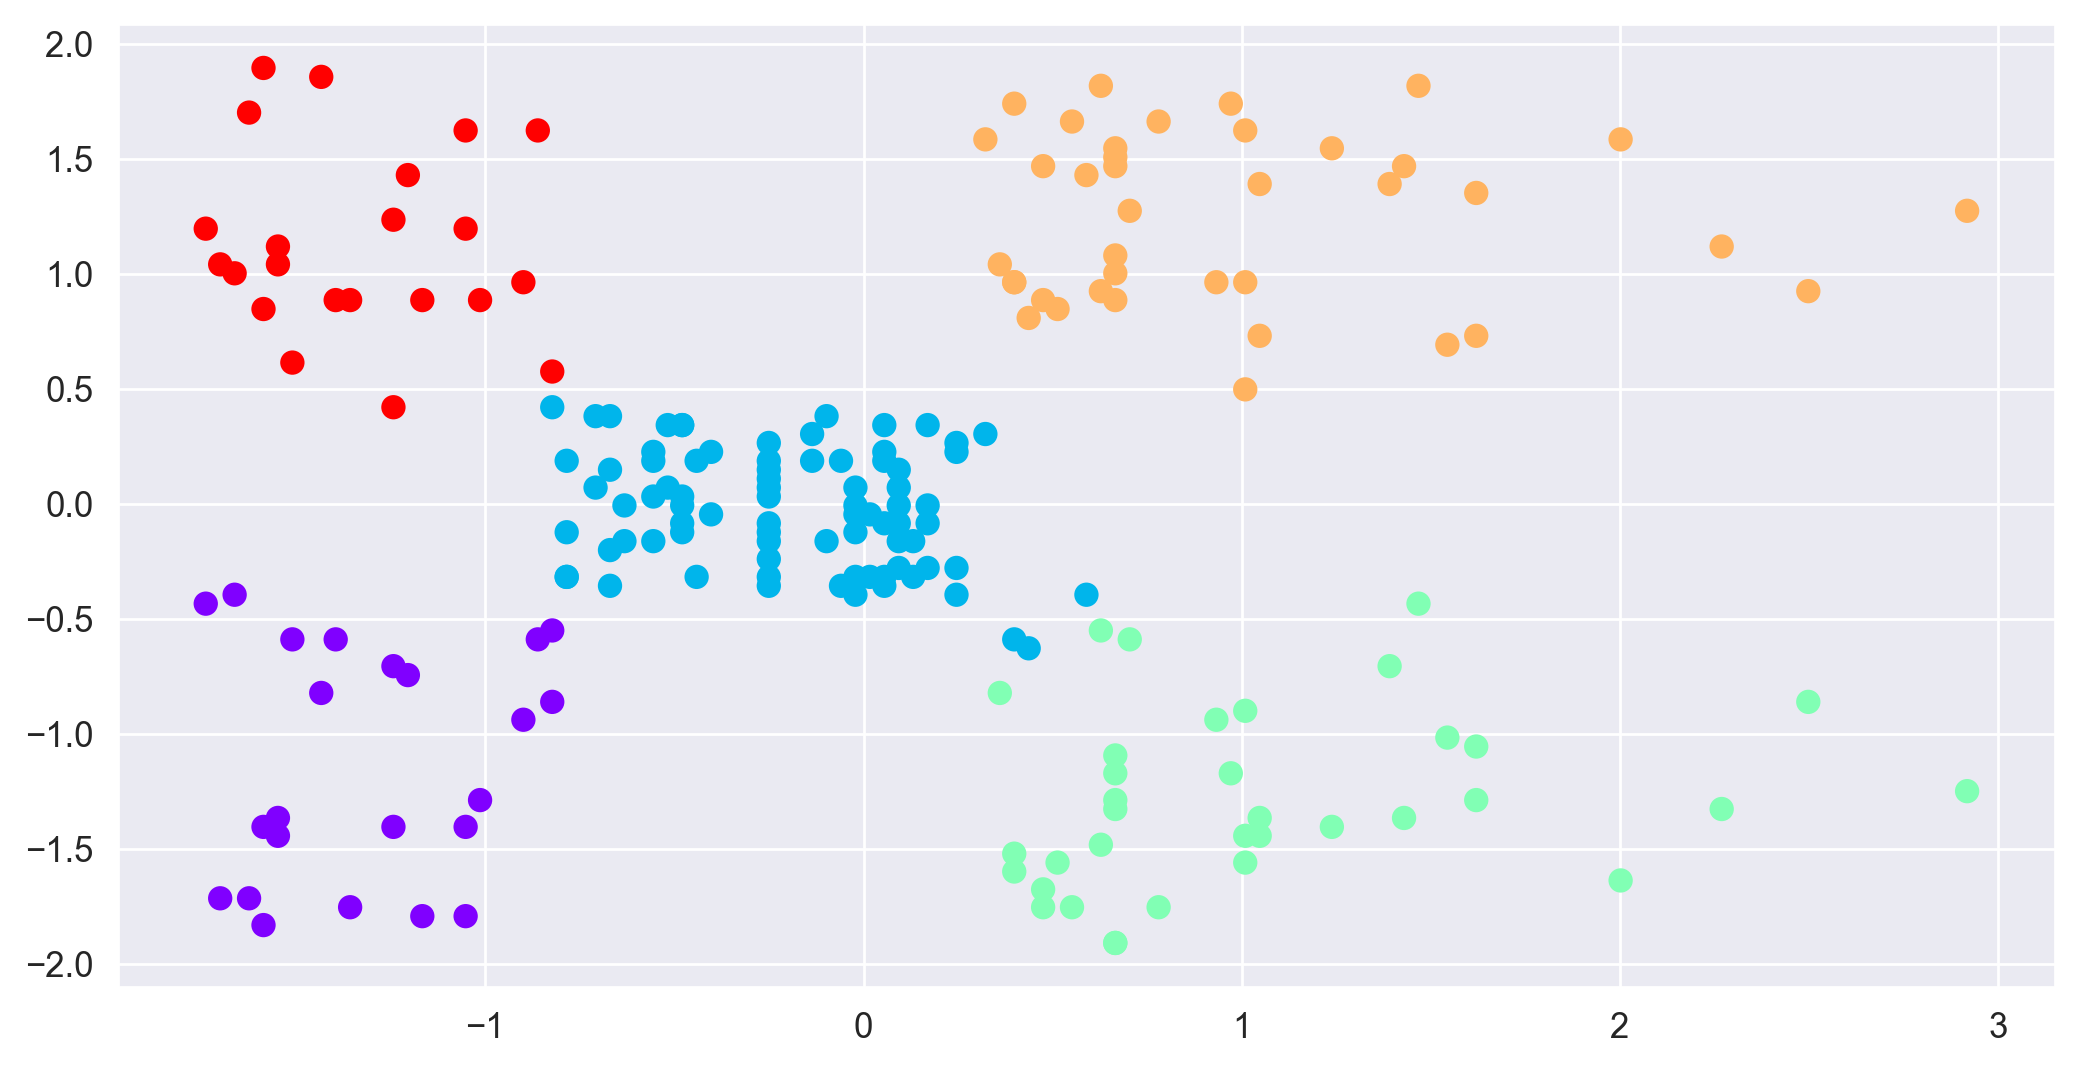

In [17]:
plt.scatter(x[:,0], x[:,1], c=ypred, cmap='rainbow')

In [18]:
km.cluster_centers_

array([[-1.30751869, -1.13696536],
       [-0.20091257, -0.02645617],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788]])

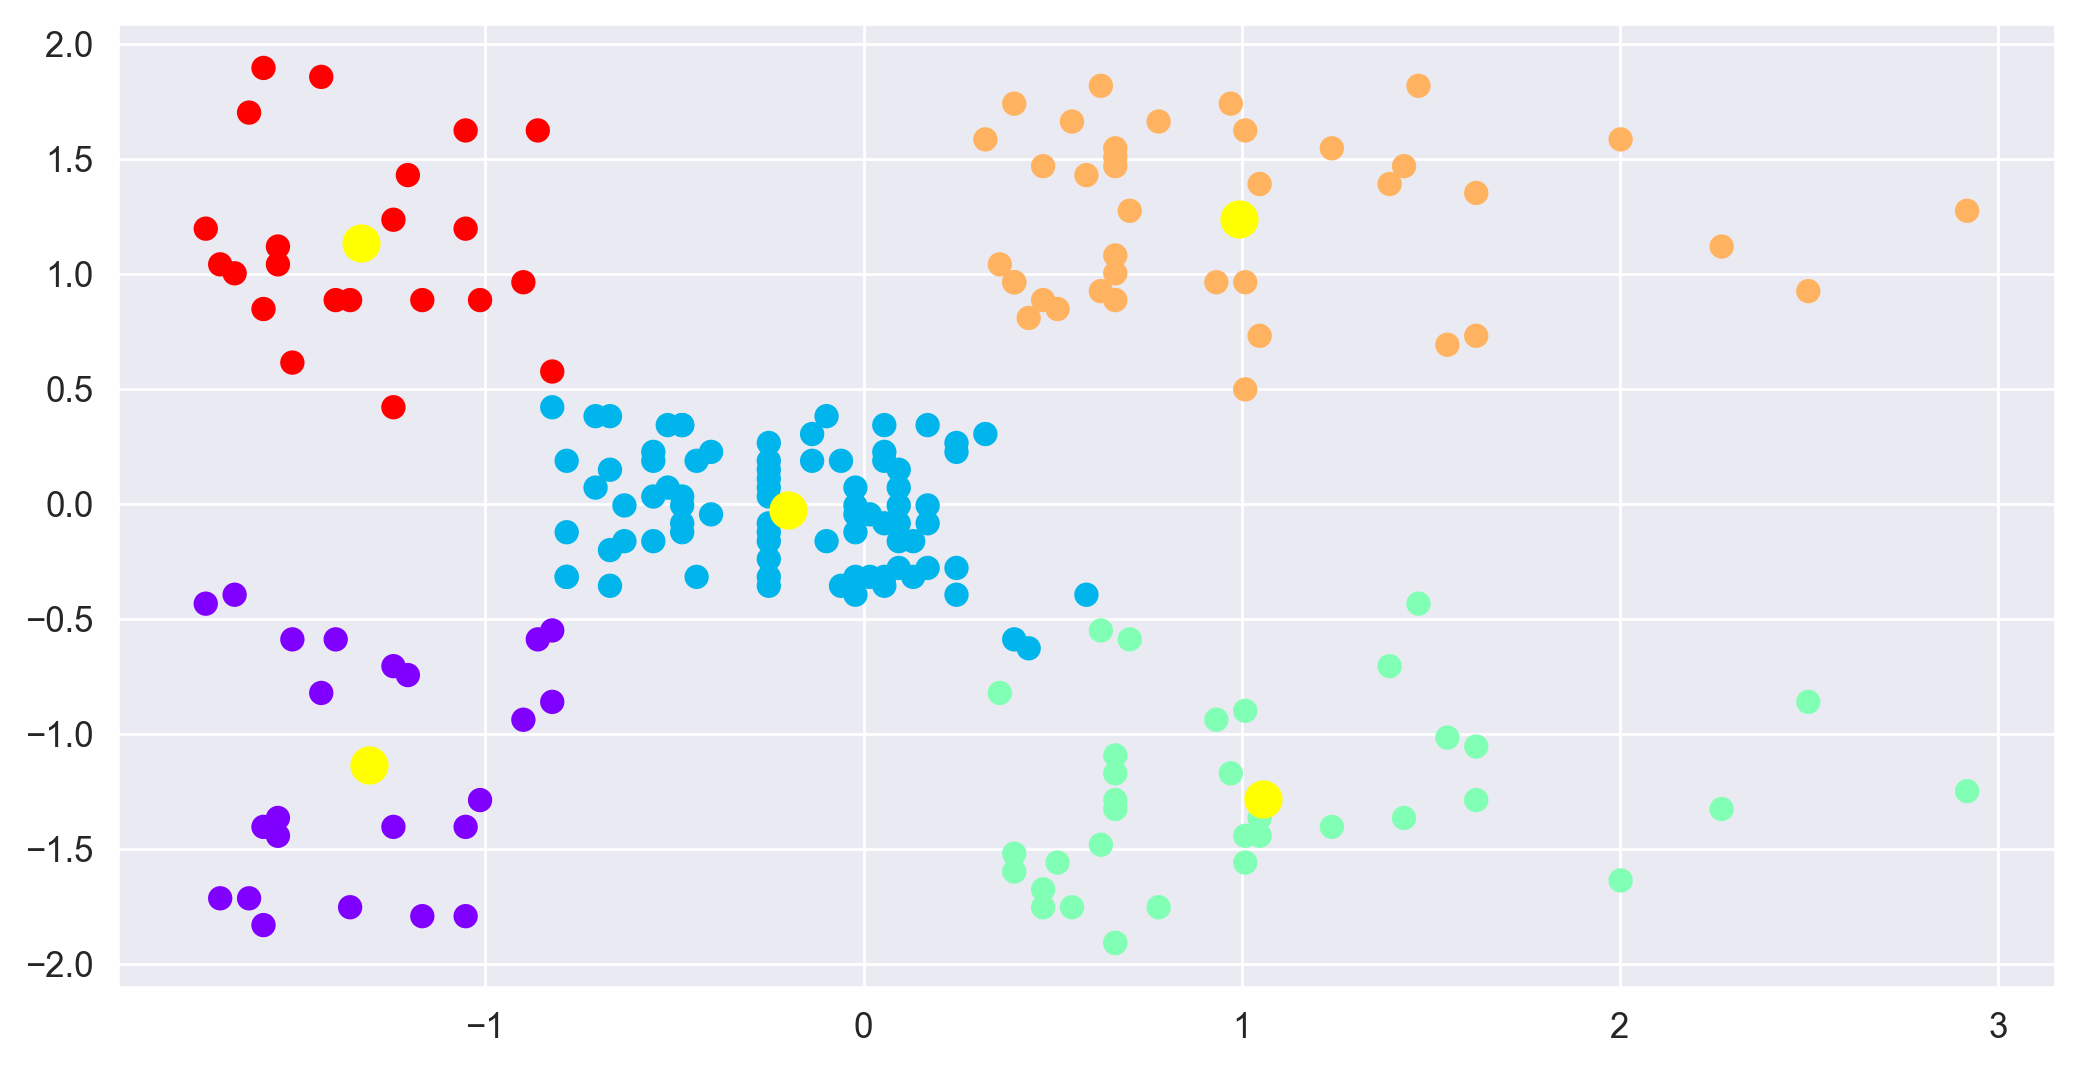

In [19]:
plt.scatter(x[:,0], x[:,1], c=ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='yellow', s=100)

In [20]:
silhouette_score(x,ypred)

0.5546571631111091

In [21]:
!pip install yellowbrick

In [22]:
from yellowbrick.cluster import SilhouetteVisualizer

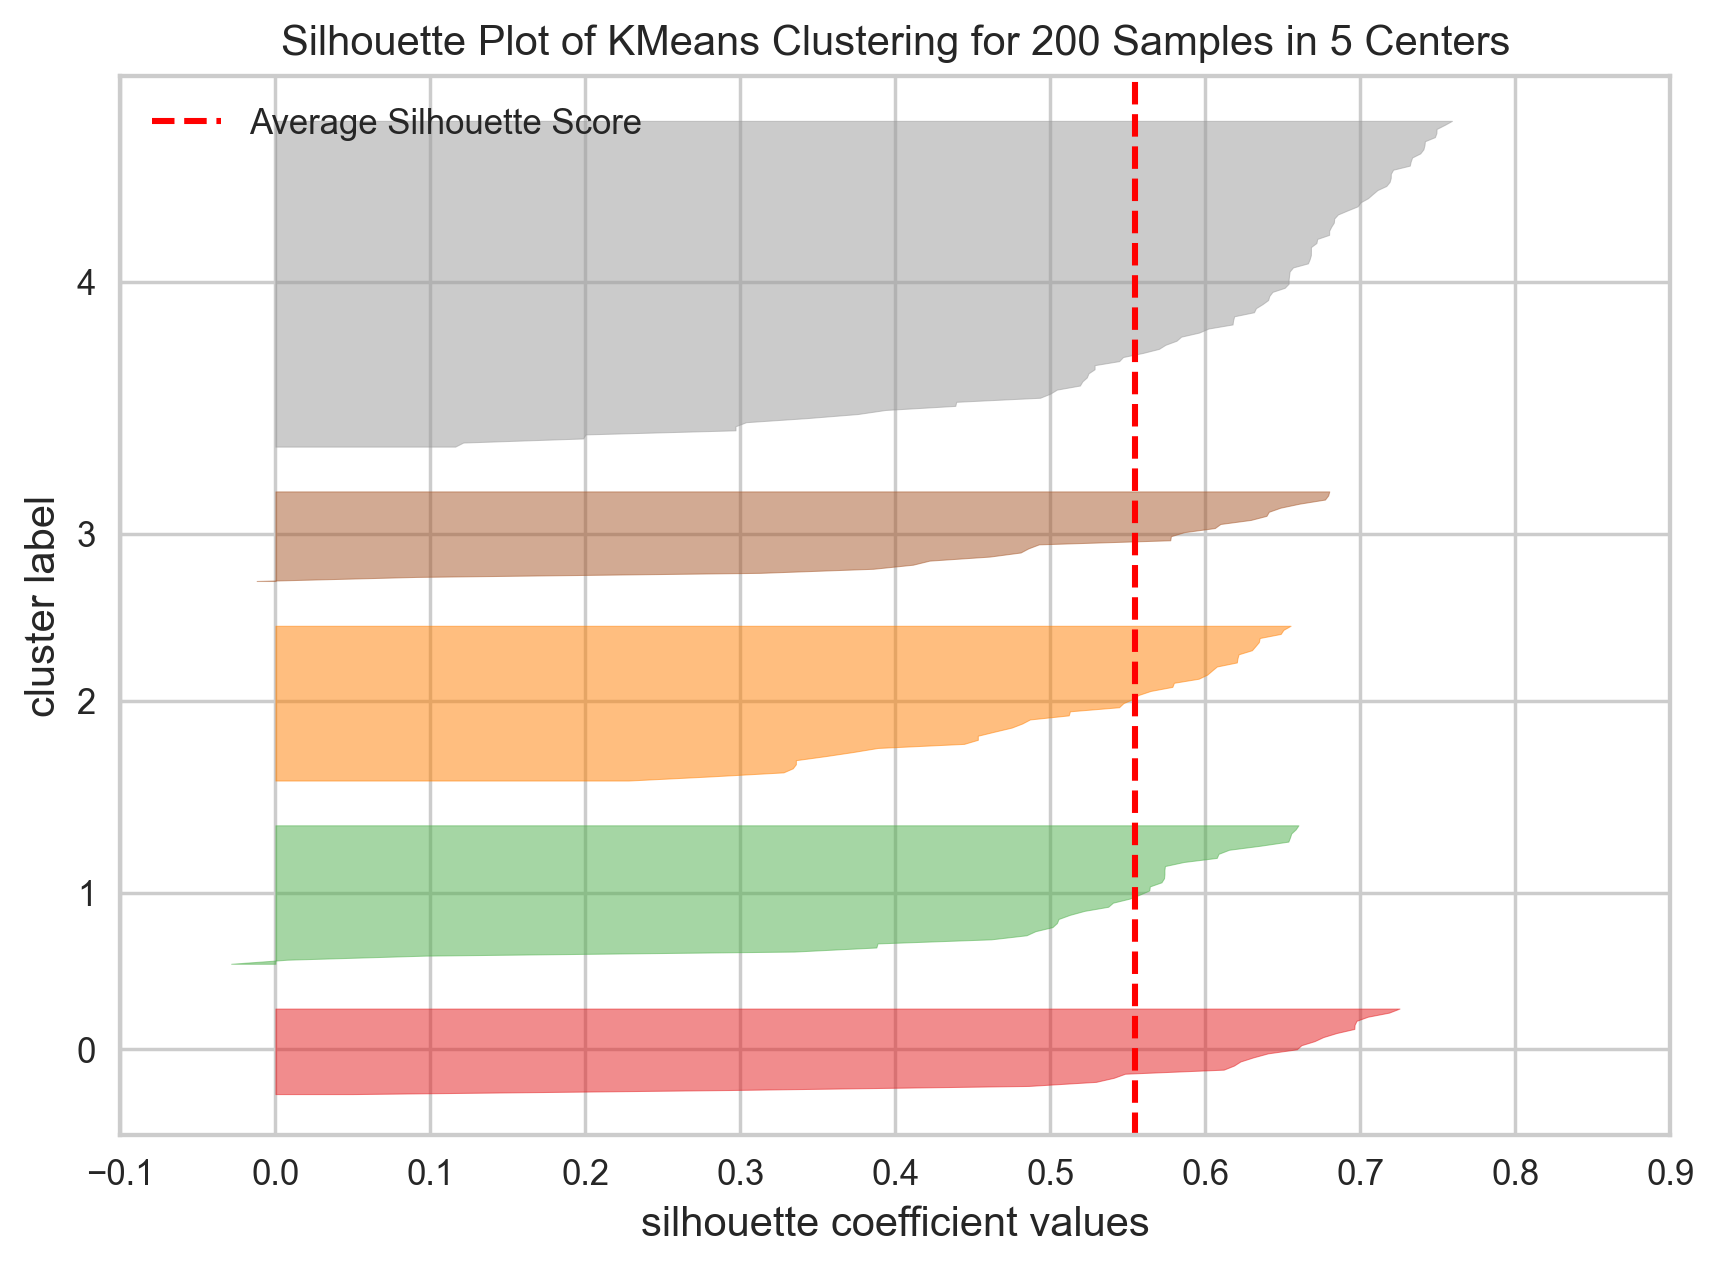

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 200 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [23]:
model = SilhouetteVisualizer(KMeans(n_clusters=5))
vis = model.fit(x)
vis.show()

In [24]:
sil_score = []

for i in range(2,20):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    sil_score.append(silhouette_score(x,y))

In [25]:
sil_score

[0.2960501571074202,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5380630705007141,
 0.5256026931619203,
 0.45635643708021434,
 0.455477460588866,
 0.4476280825932578,
 0.43537154929214267,
 0.42956485877903133,
 0.41510664400365527,
 0.40926731658763515,
 0.42369519977610126,
 0.42777161347597414,
 0.4162547541844627,
 0.41059320441612884,
 0.413562402728505]

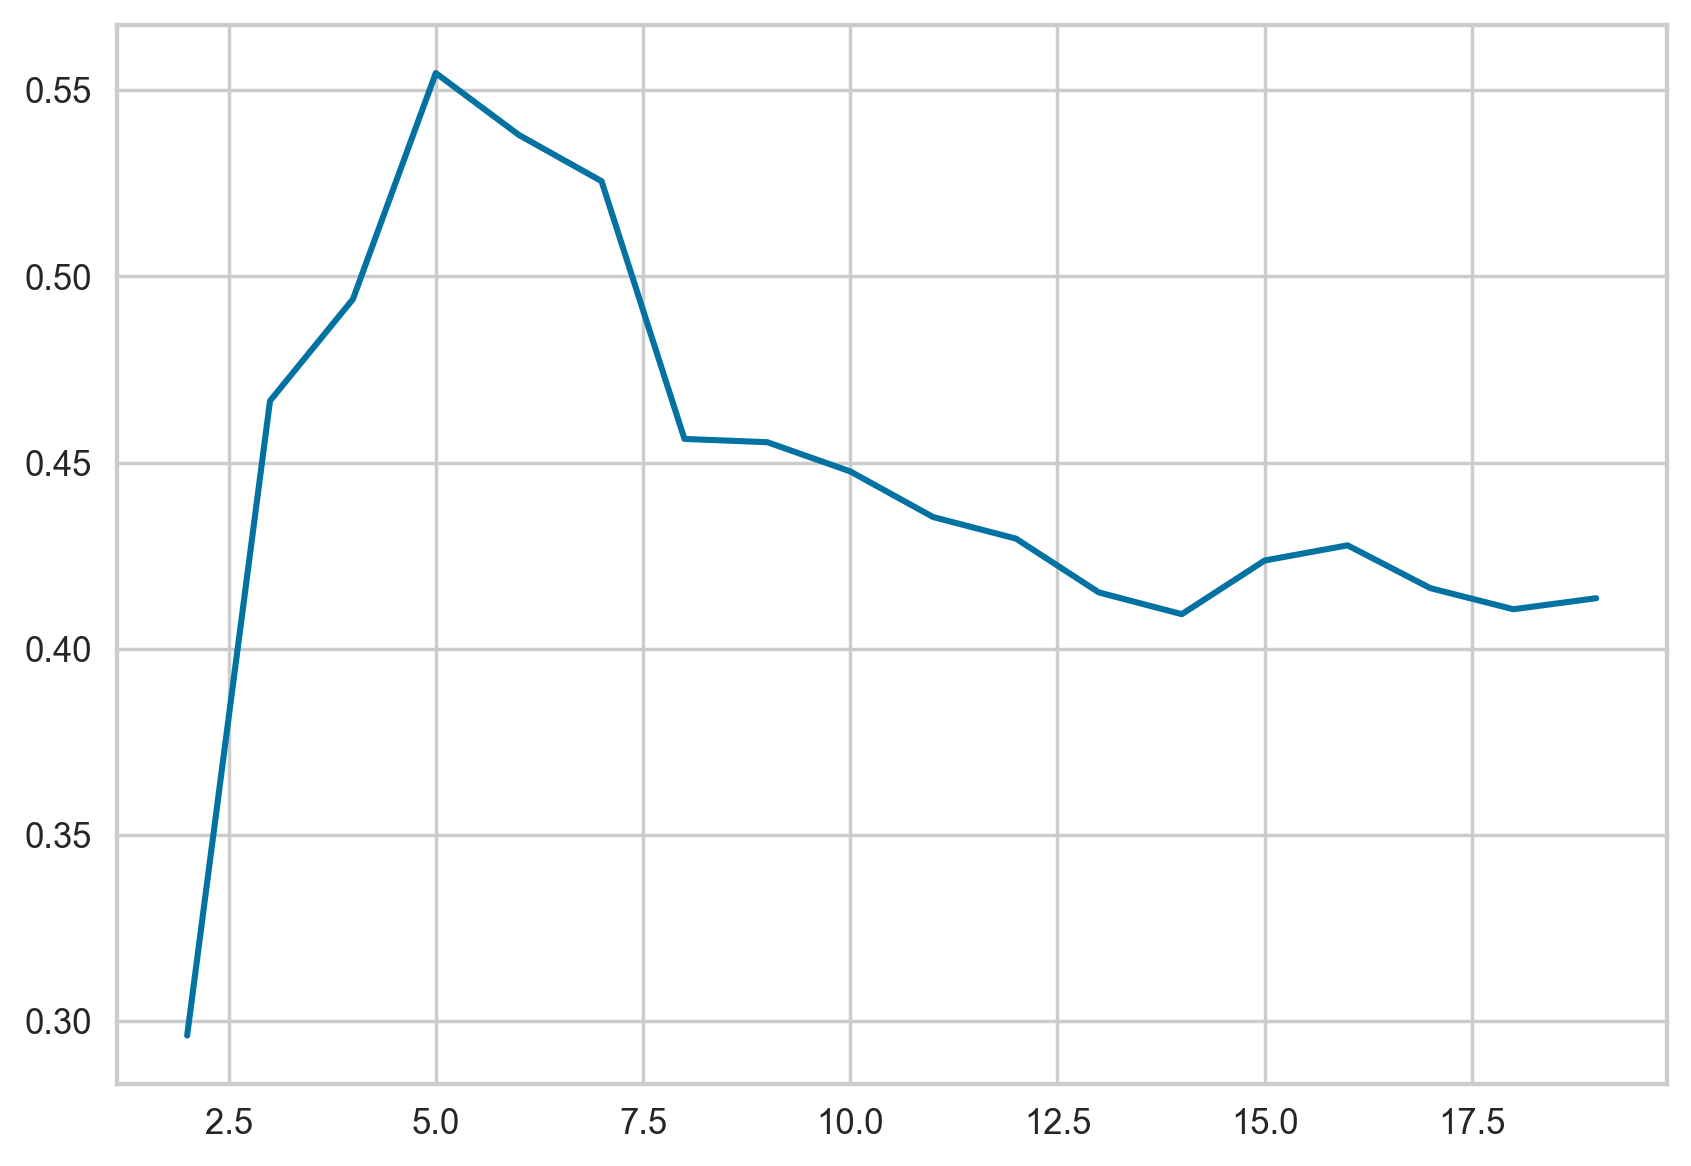

In [26]:
plt.plot(range(2,20), sil_score)

In [27]:
df['cluster']=ypred
df

,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,
1,15,39,0
2,15,81,4
3,16,6,0
4,16,77,4
5,17,40,0
...,...,...,...
196,120,79,3
197,126,28,2
198,126,74,3


In [28]:
df.groupby('cluster').agg('mean')

,Annual Income (k$),Spending Score (1-100)
cluster,,
0,26.304348,20.913043
1,55.296296,49.518519
2,88.200000,17.114286
3,86.538462,82.128205
4,25.727273,79.363636
